# Formula 1 Race Predictor
### CP468 Final Project
### By: Robert Mazza and Ronny Yehia

<img src="./Images/F1-logo.png" alt="F1 Logo" width="50%"/>

Data set used: https://www.kaggle.com/code/johnnymcclorey/f1-exploratory-analysis

See the README for more contextual information around this project.

# Data Collection and Cleaning

### Importing the data

In [246]:
import pandas as pd
import numpy as np

# Importing the datasets
results_df = pd.read_csv('./data/results.csv')
status_df = pd.read_csv('./data/status.csv')
drivers_df = pd.read_csv('./data/drivers.csv')
races_df = pd.read_csv('./data/races.csv')
constructor_df = pd.read_csv('./data/constructors.csv')
driver_standings_df = pd.read_csv('./data/driver_standings.csv')
quali_df = pd.read_csv('./data/qualifying.csv')
constructor_standings_df = pd.read_csv('./data/constructor_standings.csv')
pd.get_option("display.max_columns",None)


We are importing the necessary data sets along with the necessary packages to correctly assess the data. The above data sets include races, drivers, standings, results, qualifications for certain races, etc. 

## Qualifying
The rules of qualifying has changed over the years regarding how many sessions there are, and the time they last. The one variable that has never changed is how the fastest lap each driver sets counts towards where they start the race. So for this reason I will only be focusing on the starting position of each driver since that is the result of their qualifying performance.

<img src="./Images/starting-grid.jpg" width="50%"/>


In [247]:

# drop driver number column as it is not needed since we have the driver id
quali_df.drop(['number'], axis=1, inplace=True)

# drop Q1, Q2, Q3 columns as we only care about starting position
quali_df.drop(['q1','q2','q3'], axis=1, inplace=True)

# check for null values
print(quali_df.isna().sum())
# drop all rows that have NULL values
quali_df.dropna(inplace = True)

print((quali_df['qualifyId'] >= 0).all())
print((quali_df['raceId'] >= 0).all())
print((quali_df['driverId'] >= 0).all())
print((quali_df['constructorId'] >= 0).all())
print((quali_df['position'] >= 0).all())

print()


qualifyId        0
raceId           0
driverId         0
constructorId    0
position         0
dtype: int64
True
True
True
True
True



Prior to us even being able to predict which drivers are going to place where, we must see who qualifies. Starting position is based on the time set on the qualifying laps before the actual competitive race has begun. From there we can determine where each driver is starting, which will impact their chances in the race. 

In [248]:
quali_df.head()

,qualifyId,raceId,driverId,constructorId,position
0,1,18,1,1,1
1,2,18,9,2,2
2,3,18,5,1,3
3,4,18,13,6,4
4,5,18,2,2,5


## Races


In [249]:
# drop the time column as it is not needed
races_df.drop(['time'], axis=1, inplace=True)

# drop the wikipedia URLs column
races_df.drop(['url'], axis=1, inplace=True)

# check for null values
print(races_df.isna().sum())

races_df.info()


raceId       0
year         0
round        0
circuitId    0
name         0
date         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1079 non-null   int64 
 1   year       1079 non-null   int64 
 2   round      1079 non-null   int64 
 3   circuitId  1079 non-null   int64 
 4   name       1079 non-null   object
 5   date       1079 non-null   object
dtypes: int64(4), object(2)
memory usage: 50.7+ KB


We can see from the sums above we have no null values.

After dropping unnecessary values that wouldn't be used to determine placement in the actual race, we double check for null values to ensure there are none

In [250]:
races_df.head()

,raceId,year,round,circuitId,name,date
0,1,2009,1,1,Australian Grand Prix,29/03/09
1,2,2009,2,2,Malaysian Grand Prix,05/04/09
2,3,2009,3,17,Chinese Grand Prix,19/04/09
3,4,2009,4,3,Bahrain Grand Prix,26/04/09
4,5,2009,5,4,Spanish Grand Prix,10/05/09


## Results


In [251]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [252]:
# check for null values
results_df.isna().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [253]:
# dropping unneeded columns
results_df.drop(['time', 'number'], axis=1, inplace=True)

In [254]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25460 non-null  int64  
 1   raceId           25460 non-null  int64  
 2   driverId         25460 non-null  int64  
 3   constructorId    25460 non-null  int64  
 4   grid             25460 non-null  int64  
 5   position         25460 non-null  object 
 6   positionText     25460 non-null  object 
 7   positionOrder    25460 non-null  int64  
 8   points           25460 non-null  float64
 9   laps             25460 non-null  int64  
 10  milliseconds     25460 non-null  object 
 11  fastestLap       25460 non-null  object 
 12  rank             25460 non-null  object 
 13  fastestLapTime   25460 non-null  object 
 14  fastestLapSpeed  25460 non-null  object 
 15  statusId         25460 non-null  int64  
dtypes: float64(1), int64(8), object(7)
memory usage: 3.1+ MB


We can see that both "position" and "fastestLapSpeed" are not numerical, which is fixed below.

In [255]:
pd.to_numeric(results_df['fastestLapSpeed'], errors='coerce')
pd.to_numeric(results_df['position'], errors='coerce')

0         1.0
1         2.0
2         3.0
3         4.0
4         5.0
         ... 
25455    16.0
25456    17.0
25457     NaN
25458     NaN
25459     NaN
Name: position, Length: 25460, dtype: float64

## Driver Standings

In [256]:
# check for null values
print(driver_standings_df.isna().sum())

driver_standings_df.info()

print("Checking if all values are equal or greater than zero")
# check if each coloumn that is int64 has a value greater or equal of zero
# True = good, False = bad
print((driver_standings_df['driverStandingsId'] >= 0).all())
print((driver_standings_df['raceId'] >= 0).all())
print((driver_standings_df['driverId'] >= 0).all())
print((driver_standings_df['points'] >= 0).all())
print((driver_standings_df['position'] >= 0).all())
print((driver_standings_df['wins'] >= 0).all())



driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33476 entries, 0 to 33475
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33476 non-null  int64  
 1   raceId             33476 non-null  int64  
 2   driverId           33476 non-null  int64  
 3   points             33476 non-null  float64
 4   position           33476 non-null  int64  
 5   positionText       33476 non-null  object 
 6   wins               33476 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB
Checking if all values are equal or greater than zero
True
True
True
True
True
True


As presumed, the driver standings are determined by numerous factors. All the values above that are checked whether they are larger or equal to 0 play a role in determining standings, points, position, wins, etc. All these values are taken into account when attempting to determine who is likely to place where in the race

In [257]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


## Constructors Standings

In [258]:
# check for null values
print(constructor_standings_df.isna().sum())

constructor_standings_df.info()

print("Checking if all values are equal or greater than zero")
# check if each coloumn that is int64 has a value greater or equal of zero
# True = good, False = bad
print((constructor_standings_df['constructorStandingsId'] >= 0).all())
print((constructor_standings_df['raceId'] >= 0).all())
print((constructor_standings_df['constructorId'] >= 0).all())
print((constructor_standings_df['points'] >= 0).all())
print((constructor_standings_df['position'] >= 0).all())
print((constructor_standings_df['wins'] >= 0).all())


constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12741 non-null  int64  
 1   raceId                  12741 non-null  int64  
 2   constructorId           12741 non-null  int64  
 3   points                  12741 non-null  float64
 4   position                12741 non-null  int64  
 5   positionText            12741 non-null  object 
 6   wins                    12741 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 696.9+ KB
Checking if all values are equal or greater than zero
True
True
True
True
True
True


In [259]:
constructor_standings_df.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


## Constructors

In [260]:
# check for null values
print(constructor_df.isna().sum())

# drop URL column
constructor_df.drop(['url'], axis=1, inplace=True)
# drop constructor natonality column as it is not needed
constructor_df.drop(['nationality'], axis=1, inplace=True)

constructor_df.info()

print("Checking if all values are equal or greater than zero")
# check if each coloumn that has a value greater or equal of zero or not ''
# True = good, False = bad
print((constructor_df['name'] != '').all())
print((constructor_df['constructorRef'] != '').all())
print((constructor_df['constructorId'] >= 0).all())


constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.1+ KB
Checking if all values are equal or greater than zero
True
True
True


A majority of the above code is testing to ensure that the data is usable, which is why we are checking for 0 values or NULL values in most of them. Values with 0 or NULL cannot be used in predicting placement.

In [261]:
constructor_df.head()

,constructorId,constructorRef,name
0,1,mclaren,McLaren
1,2,bmw_sauber,BMW Sauber
2,3,williams,Williams
3,4,renault,Renault
4,5,toro_rosso,Toro Rosso


## Drivers

In [262]:
# check for null values
print(drivers_df.isna().sum())
# drop URL column
drivers_df.drop(['url'], axis=1, inplace=True)
# drop constructor natonality column as it is not needed
drivers_df.drop(['nationality'], axis=1, inplace=True)
# drop driver number column, we will refer to each driver by their last name
drivers_df.drop(['number'], axis=1, inplace=True )

drivers_df.info()

print("Checking if all values are equal or greater than zero")
# check if each coloumn that has a value greater or equal of zero or not ''
# True = good, False = bad
print((drivers_df['driverRef'] != '').all())
print((drivers_df['code'] != '').all())
print((drivers_df['forename'] != '').all())
print((drivers_df['surname'] != '').all())
print((drivers_df['driverId'] >= 0).all())


driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   driverId   854 non-null    int64 
 1   driverRef  854 non-null    object
 2   code       854 non-null    object
 3   forename   854 non-null    object
 4   surname    854 non-null    object
 5   dob        854 non-null    object
dtypes: int64(1), object(5)
memory usage: 40.2+ KB
Checking if all values are equal or greater than zero
True
True
True
True
True


In [263]:
drivers_df.head()

,driverId,driverRef,code,forename,surname,dob
0,1,hamilton,HAM,Lewis,Hamilton,1985-01-07
1,2,heidfeld,HEI,Nick,Heidfeld,1977-05-10
2,3,rosberg,ROS,Nico,Rosberg,1985-06-27
3,4,alonso,ALO,Fernando,Alonso,1981-07-29
4,5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19


## Status
Describes the status of the car in respect to finishing the race. If the car did not finish the race then it will have a "Status" that gives some more detail to why the car did not finish. 

In [264]:
# check for null values
print(status_df.isna().sum())

status_df.info()

print((status_df['statusId'] >= 0).all())
print((status_df['status'] != '').all())


statusId    0
status      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
True
True


In [265]:
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


# Data Preperation

Merging all the dataframes into a single comprehensive one.

In [266]:
# merging all seperate dataframe into single dataframe as df
df0 = pd.merge(results_df, quali_df, on = ['raceId', 'driverId', 'constructorId'])

df1 = pd.merge(df0, races_df, on ='raceId')

df2 = pd.merge(df1, drivers_df, on = 'driverId')

df3 = pd.merge(df2, driver_standings_df, on = 'driverId')

df4 = pd.merge(df3, constructor_df, on ='constructorId')

df = pd.merge(df4, status_df, on ='statusId')
pd.get_option("display.max_columns",None)

df.drop(['statusId', 'rank','fastestLapTime', 'constructorId', 'constructorRef', 'raceId_x', 'position_x', 'position_y', 'points_x', 'raceId_y', 'qualifyId', 'positionText_x', 'positionText_y', 'driverRef'], axis=1, inplace=True)

df.head()

,resultId,driverId,grid,positionOrder,laps,milliseconds,fastestLap,fastestLapSpeed,year,round,circuitId,name_x,date,code,forename,surname,dob,driverStandingsId,points_y,position,wins,name_y,status
0,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,1,10.0,1,1,McLaren,Finished
1,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,9,14.0,1,1,McLaren,Finished
2,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,27,14.0,3,1,McLaren,Finished
3,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,48,20.0,2,1,McLaren,Finished
4,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,69,28.0,3,1,McLaren,Finished


In [267]:
df.columns

Index(['resultId', 'driverId', 'grid', 'positionOrder', 'laps', 'milliseconds',
       'fastestLap', 'fastestLapSpeed', 'year', 'round', 'circuitId', 'name_x',
       'date', 'code', 'forename', 'surname', 'dob', 'driverStandingsId',
       'points_y', 'position', 'wins', 'name_y', 'status'],
      dtype='object')

In [268]:
col_name = {'milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','name_y':'constructor_name',
 'raceId_x':'racerId','points_x':'points'}

df.rename(columns=col_name, inplace=True)

df.head()

,resultId,driverId,grid,positionOrder,laps,timetaken_in_millisec,fastestLap,max_speed,year,round,circuitId,grand_prix,date,driver_code,forename,surname,dob,driverStandingsId,points_y,position,wins,constructor_name,status
0,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,1,10.0,1,1,McLaren,Finished
1,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,9,14.0,1,1,McLaren,Finished
2,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,27,14.0,3,1,McLaren,Finished
3,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,48,20.0,2,1,McLaren,Finished
4,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,69,28.0,3,1,McLaren,Finished


In [269]:
# Combining the forename and surname of the driver into a single column
df['driver_name'] = df['forename'] + ' ' + df['surname']
df  = df.drop(['forename', 'surname'], axis=1)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559704 entries, 0 to 1559703
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   resultId               1559704 non-null  int64  
 1   driverId               1559704 non-null  int64  
 2   grid                   1559704 non-null  int64  
 3   positionOrder          1559704 non-null  int64  
 4   laps                   1559704 non-null  int64  
 5   timetaken_in_millisec  1559704 non-null  object 
 6   fastestLap             1559704 non-null  object 
 7   max_speed              1559704 non-null  object 
 8   year                   1559704 non-null  int64  
 9   round                  1559704 non-null  int64  
 10  circuitId              1559704 non-null  int64  
 11  grand_prix             1559704 non-null  object 
 12  date                   1559704 non-null  object 
 13  driver_code            1559704 non-null  object 
 14  dob               

Date and dob columns are being stored as an Object, so it will be changed to Date object below.

In [271]:
pd.to_datetime(df.date)

0         2008-03-16
1         2008-03-16
2         2008-03-16
3         2008-03-16
4         2008-03-16
             ...    
1559699   2021-12-12
1559700   2021-12-12
1559701   2021-12-12
1559702   2021-12-12
1559703   2021-12-12
Name: date, Length: 1559704, dtype: datetime64[ns]

In [272]:
df['dob'] = pd.to_datetime(df['dob'])
df['date'] = pd.to_datetime(df['date'])

In [273]:
from datetime import datetime

# getting each driver's age and storing it in a new column 'age'

dates = datetime.today()-df['dob']
age = dates.dt.days/365
# round them up if they are close to their next birthday than their last
df['age'] = round(age) 
pd.set_option('display.max_columns', None)

df.drop(['dob'], axis=1, inplace=True)

df.head()

,resultId,driverId,grid,positionOrder,laps,timetaken_in_millisec,fastestLap,max_speed,year,round,circuitId,grand_prix,date,driver_code,driverStandingsId,points_y,position,wins,constructor_name,status,driver_name,age
0,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,2008-03-16,HAM,1,10.0,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,2008-03-16,HAM,9,14.0,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,2008-03-16,HAM,27,14.0,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,2008-03-16,HAM,48,20.0,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,1,1,1,58,5690616,39,218.300,2008,1,1,Australian Grand Prix,2008-03-16,HAM,69,28.0,3,1,McLaren,Finished,Lewis Hamilton,38.0


In [274]:
# changing datatype

l = ['timetaken_in_millisec','fastestLap','max_speed']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [275]:
# filling missing values
df[['fastestLap']] = df[['fastestLap']].fillna(0)
df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(df['timetaken_in_millisec'].mean())
df['max_speed']= df['max_speed'].fillna(df['max_speed'].mean())
df.isnull().sum() / len(df) * 100

resultId                 0.0
driverId                 0.0
grid                     0.0
positionOrder            0.0
laps                     0.0
timetaken_in_millisec    0.0
fastestLap               0.0
max_speed                0.0
year                     0.0
round                    0.0
circuitId                0.0
grand_prix               0.0
date                     0.0
driver_code              0.0
driverStandingsId        0.0
points_y                 0.0
position                 0.0
wins                     0.0
constructor_name         0.0
status                   0.0
driver_name              0.0
age                      0.0
dtype: float64

In [276]:

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [277]:
df[cat].head()

,grand_prix,driver_code,constructor_name,status,driver_name
0,Australian Grand Prix,HAM,McLaren,Finished,Lewis Hamilton
1,Australian Grand Prix,HAM,McLaren,Finished,Lewis Hamilton
2,Australian Grand Prix,HAM,McLaren,Finished,Lewis Hamilton
3,Australian Grand Prix,HAM,McLaren,Finished,Lewis Hamilton
4,Australian Grand Prix,HAM,McLaren,Finished,Lewis Hamilton


In [278]:
df[num].head()

,resultId,driverId,grid,positionOrder,laps,timetaken_in_millisec,fastestLap,max_speed,year,round,circuitId,date,driverStandingsId,points_y,position,wins,age
0,1,1,1,1,58,5690616.0,39.0,218.3,2008,1,1,2008-03-16,1,10.0,1,1,38.0
1,1,1,1,1,58,5690616.0,39.0,218.3,2008,1,1,2008-03-16,9,14.0,1,1,38.0
2,1,1,1,1,58,5690616.0,39.0,218.3,2008,1,1,2008-03-16,27,14.0,3,1,38.0
3,1,1,1,1,58,5690616.0,39.0,218.3,2008,1,1,2008-03-16,48,20.0,2,1,38.0
4,1,1,1,1,58,5690616.0,39.0,218.3,2008,1,1,2008-03-16,69,28.0,3,1,38.0


# Exploritory Analysis

## Qualifying Advantage?
Everyone knows that qualifying is a big deal, but how important is a high starting position? More specifically, how important is qualifying first? This changes depending on the circuit as some circuits are narrow and hard to perform overtakes such as Monaco where qualifying position is almost more important than the race itself.

Correlation: 0.6047477234769348


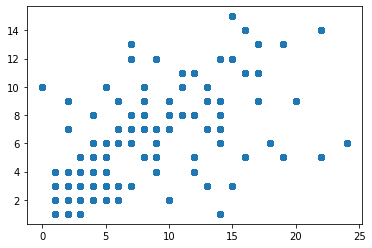

In [279]:
import matplotlib.pyplot as plt

# circuitId: 6 is monaco
x = df[(df.circuitId == 6) & (df.status == 'Finished')].grid

# using positionOrder here because it takes into account finishing position of DNFs
y = df[(df.circuitId == 6) & (df.status == 'Finished')].positionOrder

plt.scatter(x,y)

b, a = np.polyfit(x, y, deg=1)

print("Correlation:", x.corr(y))


We can see that there is a moderate positive correlation between a drivers starting position and finishing position at Monaco. This is most likely due to all the other variables of racing like crashes and pit strategies that mix up the grid from qualifying order.

### How Important Is Starting From 1st?



(array([76292.,  8367.,  3309.,  1461.,  1016.,  1585.,   851.,     0.,
            0.,   566.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

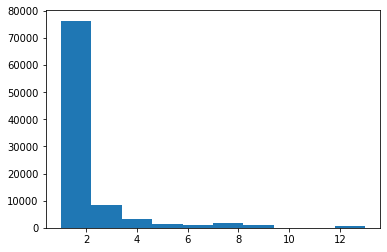

In [280]:
x = df[(df.grid == 1) & (df.status == 'Finished')].positionOrder
plt.hist(x)

In [281]:
x.mean()

1.866448361103085

From the figure above and a mean finishing position of 1.8 if the driver started from 1st, we can make the conclusion that qualifying position is vital for winning a race.

## Grand Prix Locations
Formula 1 has been running since the 1950s, in this time the sport has grown from a total of 7 Grand Proxs in a championship to 19 - 20 Grand Prixs located all around the world. Below is a map showing every circuit F1 has visited since the 1950s.

In [282]:
import folium

circuits_df = pd.read_csv('./data/circuits.csv')

coords = []

# plotting all circuits F1 has raced at in the world
for lat,lng in zip(circuits_df['lat'],circuits_df['lng']):
    coords.append([lat,lng])
maps = folium.Map(zoom_start=2,tiles='OpenStreetMap')  #map_types (Stamen Terrain, Stamen Toner, Mapbox Bright, cartodbpositron)
for i,j in zip(coords,circuits_df.name):
    marker = folium.Circle(
        location=i,
        radius=1000,
        popup="<strong>{0}</strong>".format(j))  #strong is used to bold the font (optional)
    marker.add_to(maps)
maps

# Machine Learning Model

### Regression

Processing the data into and x and y set. x will contain all our data used to predict y, which is the finishing position. We are only going to look at races after 1990 as there are major gaps in the data before then.

In [288]:
x = df.drop(['positionOrder'], axis=1)
x = x[(x.status == 'Finished') & (x.year > 1990)]
x.head()



AttributeError: 'list' object has no attribute 'drop'

In [284]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814219 entries, 0 to 814218
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   resultId               814219 non-null  int64         
 1   driverId               814219 non-null  int64         
 2   grid                   814219 non-null  int64         
 3   laps                   814219 non-null  int64         
 4   timetaken_in_millisec  814219 non-null  float64       
 5   fastestLap             814219 non-null  float64       
 6   max_speed              814219 non-null  float64       
 7   year                   814219 non-null  int64         
 8   round                  814219 non-null  int64         
 9   circuitId              814219 non-null  int64         
 10  grand_prix             814219 non-null  object        
 11  date                   814219 non-null  datetime64[ns]
 12  driver_code            814219 non-null  obje

In [290]:
y = df[(df.status == 'Finished') & (df.year > 1990)].positionOrder
y.head()

0    1
1    1
2    1
3    1
4    1
Name: positionOrder, dtype: int64

### Data Splitting
Splitting the data 80/20. 80% training, 20% testing.


In [286]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

### Model Building

Starting with linear regression.

In [287]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

ValueError: could not convert string to float: 'Monaco Grand Prix'

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print(lr_train_mse)

In [ ]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']